## 1. 그림 4.18 을 직접 실험 해보시오
150 rows, 150 columns, 10,000 agents of each type, 2500 empty cells

In [1]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
import random
import copy

In [2]:
width = 150
height = 150

races = 2
empty_ratio = 1/9

similiarity_threshold = 0.375
n_iterations = 1000

In [3]:
# populate

empty_houses = []
agents = {}

# [(0,0), (0,1), ..., (9.8), (9,9)]
all_houses = list(itertools.product(range(width), range(height)))

random.shuffle(all_houses)
n_empty = int(len(all_houses) * empty_ratio)

empty_houses = all_houses[:n_empty]
remaining_houses = all_houses[n_empty:]

# x[startAt:endBefore:step]
houses_by_race = [remaining_houses[i::races] for i in range(races)]

In [ ]:
# agents[(x, y)] = race
for race, houses in enumerate(houses_by_race):
    for house in houses:
        agents[house] = race

print(agents)

In [5]:
def is_unsatisfied(x, y):
    race = agents[(x, y)]
    count_similar = 0
    count_different = 0

    if x > 0 and y > 0 and (x-1, y-1) not in empty_houses:
        # 10시 방향
        if agents[(x-1, y-1)] == race:
            count_similar += 1
        else:
            count_different += 1
    if y > 0 and (x, y-1) not in empty_houses:
        # 12시 방향
        if agents[(x, y-1)] == race:
            count_similar += 1
        else:
            count_different += 1
    if x < (width-1) and y > 0 and (x+1, y-1) not in empty_houses:
        # 2시 방향
        if agents[(x+1, y-1)] == race:
            count_similar += 1
        else:
            count_different += 1
    if x > 0 and (x-1, y) not in empty_houses:
        # 9시 방향
        if agents[(x-1, y)] == race:
            count_similar += 1
        else:
            count_different += 1
    if x < (width-1) and (x+1, y) not in empty_houses:
        # 3시 방향
        if agents[(x+1, y)] == race:
            count_similar += 1
        else:
            count_different += 1
    if x > 0 and y < (height-1) and (x-1, y+1) not in empty_houses:
        # 8시 방향
        if agents[(x-1, y+1)] == race:
            count_similar += 1
        else:
            count_different += 1
    if x > 0 and y < (height-1) and (x, y+1) not in empty_houses:
        # 6시 방향
        if agents[(x, y+1)] == race:
            count_similar += 1
        else:
            count_different += 1
    if x < (width-1) and y < (height-1) and (x+1, y+1) not in empty_houses:
        # 5시 방향
        if agents[(x+1, y+1)] == race:
            count_similar +=1
        else:
            count_different += 1

    if count_similar + count_different == 0:
        return False
    else:
        return float(count_similar) / (count_similar + count_different) < similiarity_threshold

In [6]:
def move_to_empty(agent):
    agent_race = agents[agent]
    empty_house = random.choice(empty_houses)
    agents[empty_house] = agent_race
    del agents[agent]
    empty_houses.remove(empty_house)
    empty_houses.append(agent)

In [7]:
plt.rcParams.update({'figure.figsize': (15, 10)})

def plot(iteration):
    fig, ax = plt.subplots()
    agent_colors = {0:'b', 1:'r', 2:'g', 3:'y', 4:'m', 5:'c', 6:'k'}

    for agent in agents:
        ax.scatter(agent[0]+0.5, agent[1]+0.5, color=agent_colors[agents[agent]])
    ax.set_title('iteration: %d:' % iteration, fontsize=10, fontweight='bold')
    ax.set_xlim([0, width])
    ax.set_ylim([0, height])
    ax.set_xticks([])
    ax.set_yticks([])
    plt.savefig('shelling/iter_%d.png' % iteration)

iteration: 1, Number of changes: 4015
iteration: 18, Number of changes: 0


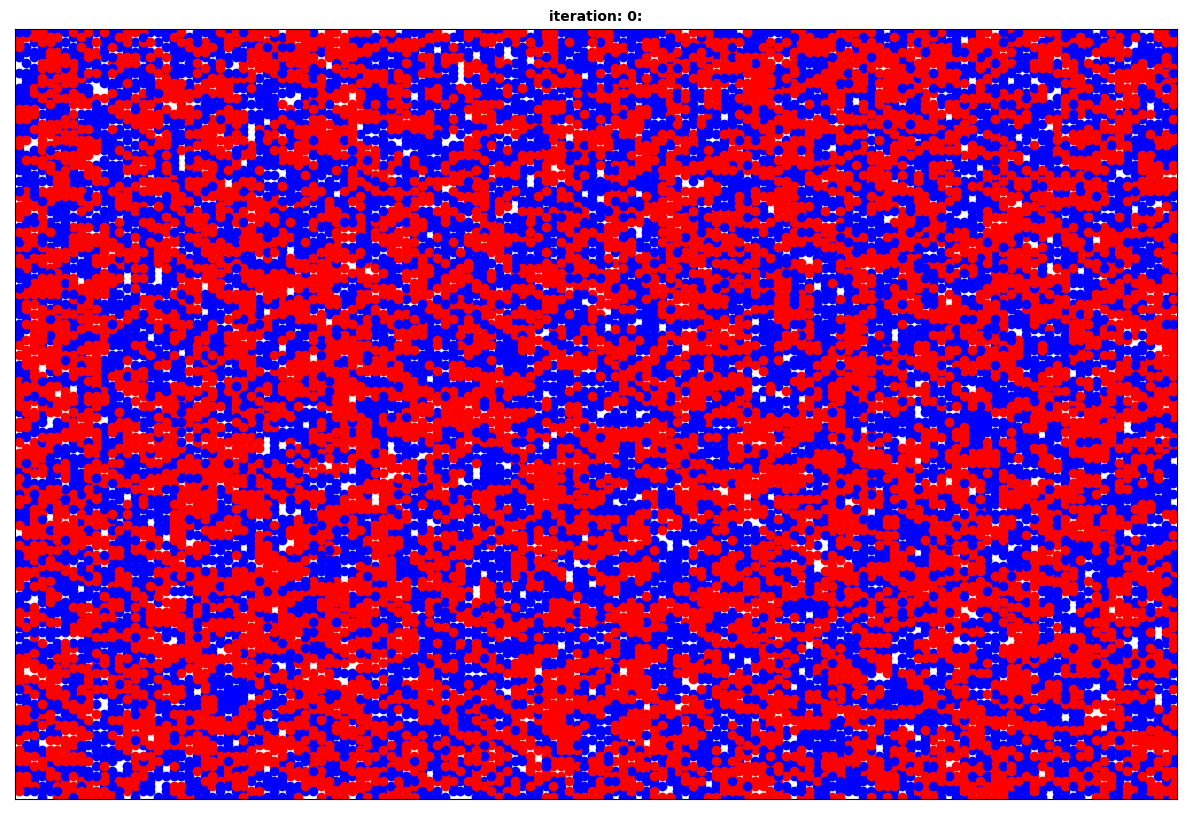

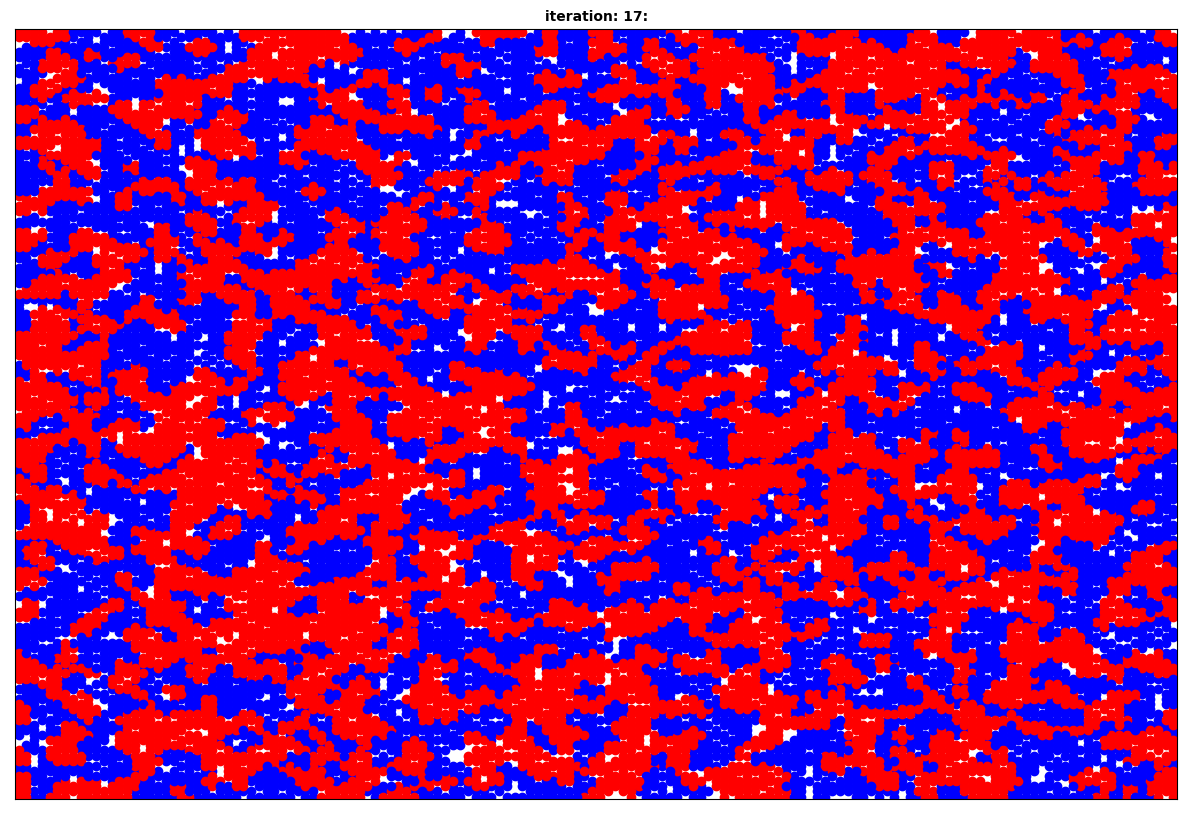

In [8]:
for i in range(n_iterations):
    old_agents = copy.deepcopy(agents)
    n_changes = 0

    for agent in old_agents:
        if is_unsatisfied(agent[0], agent[1]):
            move_to_empty(agent)
            n_changes += 1

    if i == 0:
        plot(i)
        print('iteration: %d, Number of changes: %d' % (i+1, n_changes))
    if n_changes == 0:
        plot(i)
        print('iteration: %d, Number of changes: %d' % (i+1, n_changes))
        break

## 2. 소수 인종이 있으면 어떻게 되는가? Threshold가 높아지는가?

소수 인종은 주변에 같은 인종을 두게 될 확률이 높다. <br>따라서, Threshold 값을 높여서 같은 인종을 두는 방향으로 진행하였다.<br>similiarity_threshold를 0.375에서 0.6으로 올려 근접한 8 cell 중 5 cell 이상이 되도록 설정하였다.

In [9]:
width = 150
height = 150

races = 2
empty_ratio = 1/9

similiarity_threshold = 0.6
n_iterations = 1000

In [10]:
# populate

empty_houses = []
agents = {}

# [(0,0), (0,1), ..., (9.8), (9,9)]
all_houses = list(itertools.product(range(width), range(height)))

random.shuffle(all_houses)
n_empty = int(len(all_houses) * empty_ratio)

empty_houses = all_houses[:n_empty]
remaining_houses = all_houses[n_empty:]

# x[startAt:endBefore:step]
houses_by_race = [remaining_houses[i::races] for i in range(races)]

In [11]:
plt.rcParams.update({'figure.figsize': (15, 10)})

def minority_plot(iteration):
    fig, ax = plt.subplots()
    agent_colors = {0:'b', 1:'r', 2:'g', 3:'y', 4:'m', 5:'c', 6:'k'}

    for agent in agents:
        ax.scatter(agent[0]+0.5, agent[1]+0.5, color=agent_colors[agents[agent]])
    ax.set_title('iteration: %d:' % iteration, fontsize=10, fontweight='bold')
    ax.set_xlim([0, width])
    ax.set_ylim([0, height])
    ax.set_xticks([])
    ax.set_yticks([])
    plt.savefig('shelling/minority_iter_%d.png' % iteration)

In [ ]:
# agents[(x, y)] = race
for race, houses in enumerate(houses_by_race):
    for house in houses:
        agents[house] = race

print(agents)

iteration: 1, Number of changes: 12606
iteration: 81, Number of changes: 0


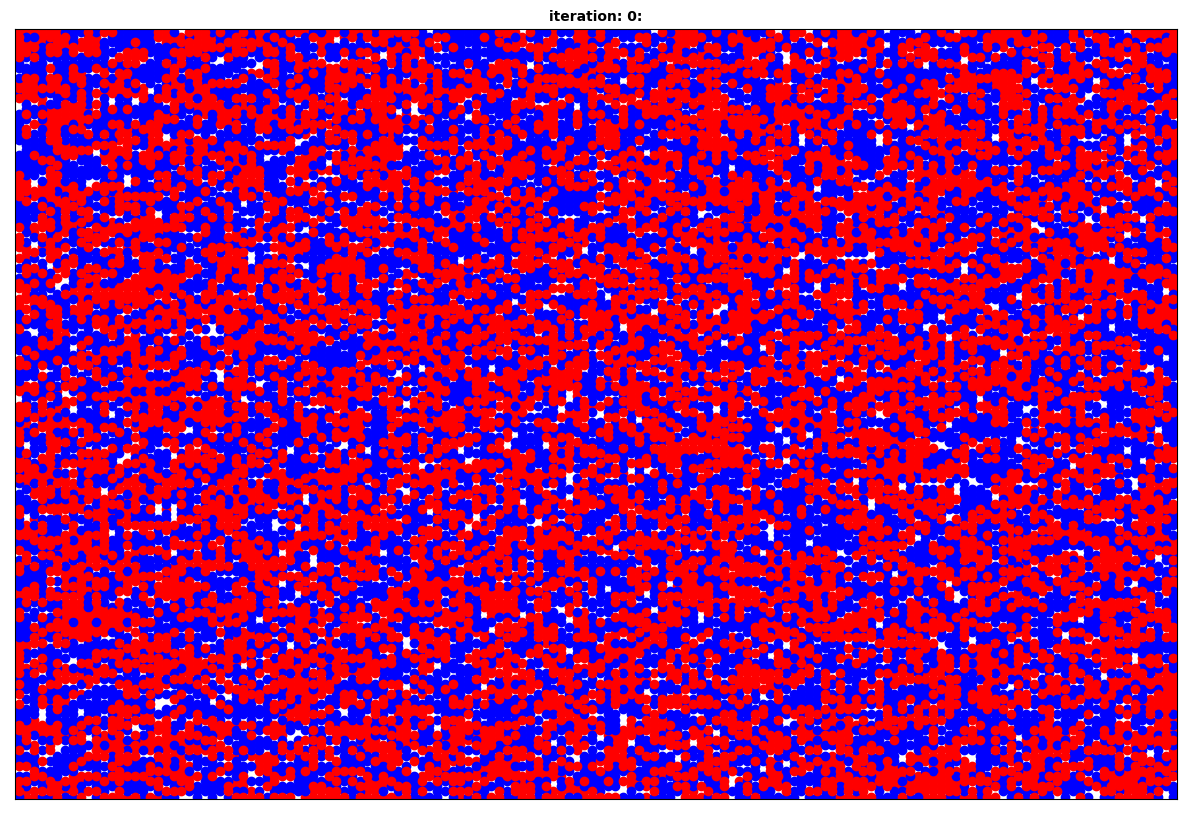

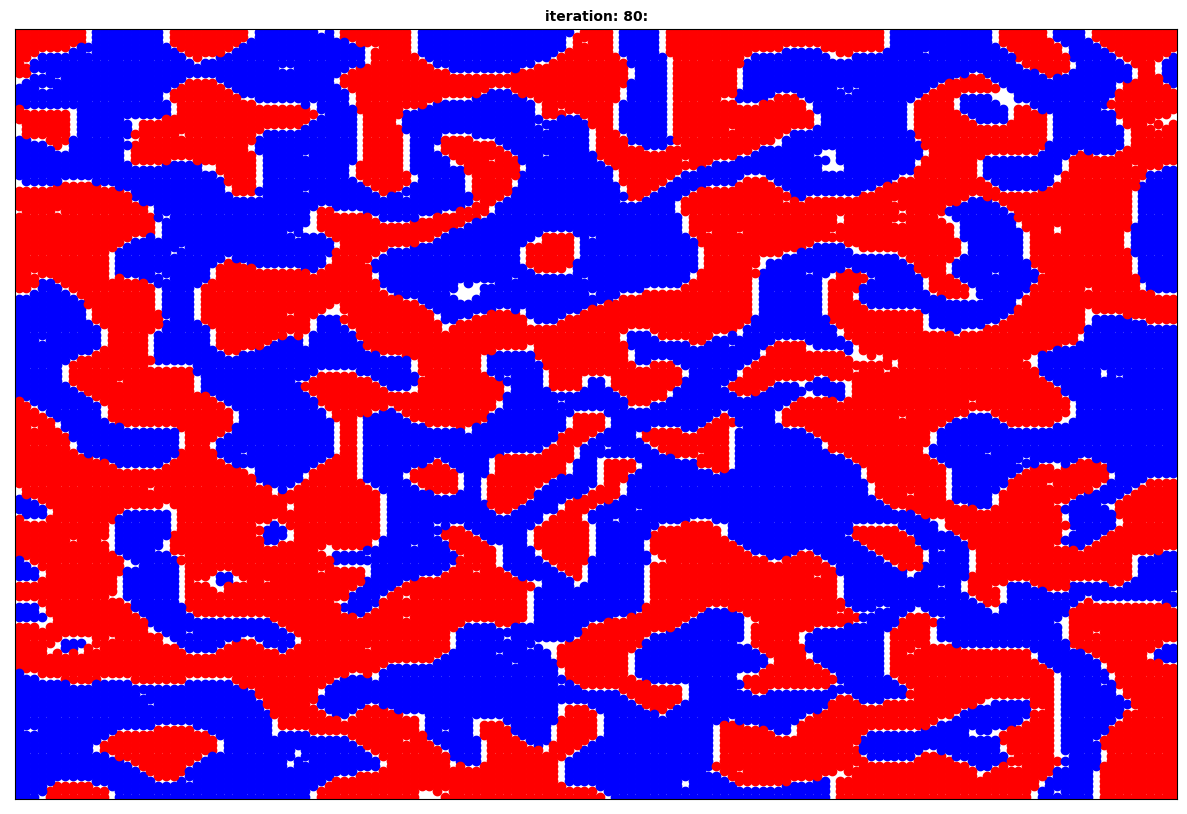

In [13]:
for i in range(n_iterations):
    old_agents = copy.deepcopy(agents)
    n_changes = 0

    for agent in old_agents:
        if is_unsatisfied(agent[0], agent[1]):
            move_to_empty(agent)
            n_changes += 1

    if i == 0:
        minority_plot(i)
        print('iteration: %d, Number of changes: %d' % (i+1, n_changes))
    if n_changes == 0:
        minority_plot(i)
        print('iteration: %d, Number of changes: %d' % (i+1, n_changes))
        break

Threshold를 높인 결과, 소수 인종들이 밀집 되는 것을 확인하였다.<br>
하지만 예상했던대로 완벽하게 분리 되지는 않는다. 이러한 현상은 실제에서도 자연스러운 상황이라고 판단된다.<br>
이러한 상황이 아예 발생하지 않도록 하기 위해서는 similiarity_threshold을 높이고 empty_ratio를 낮춰서 진행하면 될 것이다.

## 3. 다수의 인종에도 적용이 되는가? - https://www.pnas.org/content/105/11/4109

shelling 모델은 다수의 인종에도 적용할 수 있다.<br>
그러한 경우, 각 인종 마다의 agent 개수가 감소할 것이다. agent의 개수를 유지하기 위해서는 size 등 조정하면 된다.<br>
기존 코드는 7개의 인종 까지만 나타낼 수 있지만, ({0:'b', 1:'r', 2:'g', 3:'y', 4:'m', 5:'c', 6:'k'})<br>
7개 이상의 인종에 대해 나타낼 경우, plot에 있는 agent_colors = {0:'b', 1:'r', 2:'g', 3:'y', 4:'m', 5:'c', 6:'k'}를 수정하여 사용한다.

In [14]:
width = 150
height = 150

races = 4 #default = 2
empty_ratio = 1/9

similiarity_threshold = 0.375
n_iterations = 1000

In [15]:
# populate

empty_houses = []
agents = {}

# [(0,0), (0,1), ..., (9.8), (9,9)]
all_houses = list(itertools.product(range(width), range(height)))

random.shuffle(all_houses)
n_empty = int(len(all_houses) * empty_ratio)

empty_houses = all_houses[:n_empty]
remaining_houses = all_houses[n_empty:]

# x[startAt:endBefore:step]
houses_by_race = [remaining_houses[i::races] for i in range(races)]

In [ ]:
# agents[(x, y)] = race
for race, houses in enumerate(houses_by_race):
    for house in houses:
        agents[house] = race

print(agents)

In [17]:
plt.rcParams.update({'figure.figsize': (15, 10)})

def majority_plot(iteration):
    fig, ax = plt.subplots()
    agent_colors = {0:'b', 1:'r', 2:'g', 3:'y', 4:'m', 5:'c', 6:'k'}

    for agent in agents:
        ax.scatter(agent[0]+0.5, agent[1]+0.5, color=agent_colors[agents[agent]])
    ax.set_title('iteration: %d:' % iteration, fontsize=10, fontweight='bold')
    ax.set_xlim([0, width])
    ax.set_ylim([0, height])
    ax.set_xticks([])
    ax.set_yticks([])
    plt.savefig('shelling/majority_iter_%d.png' % iteration)

iteration: 1, Number of changes: 13535


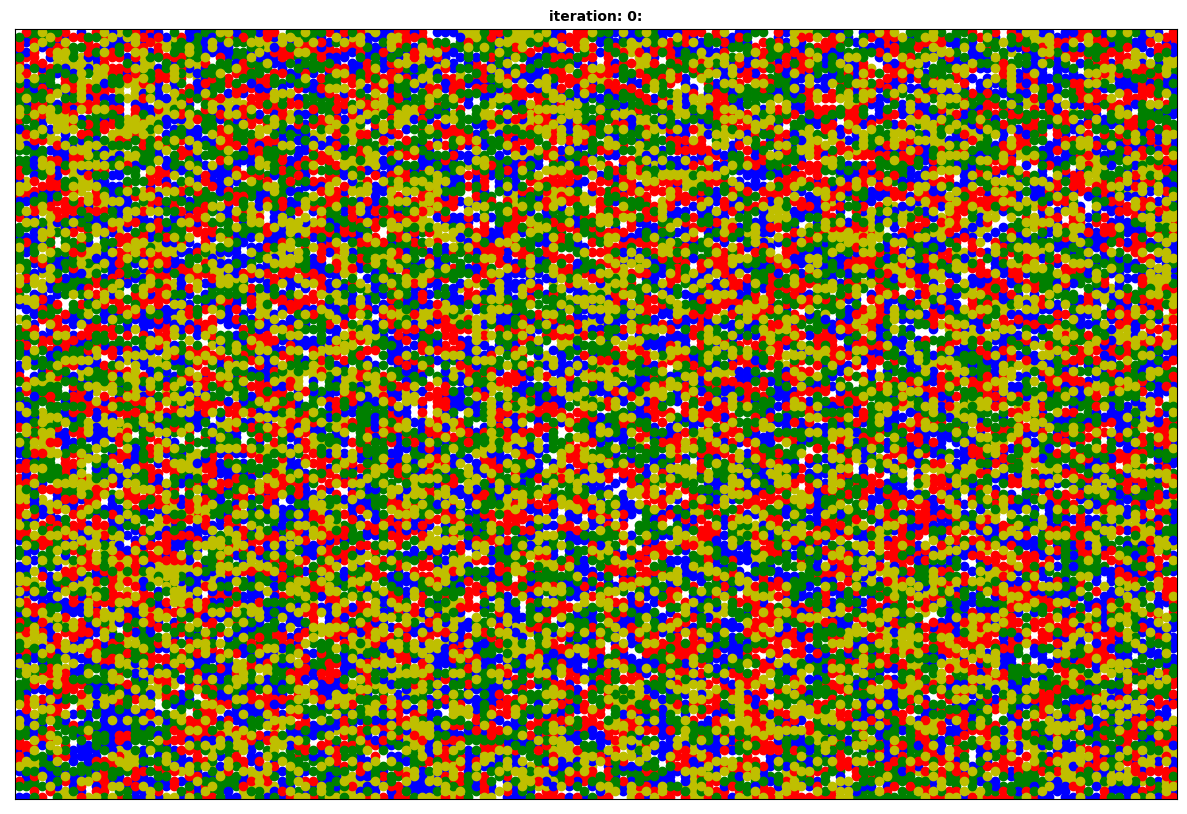

In [18]:
for i in range(n_iterations):
    old_agents = copy.deepcopy(agents)
    n_changes = 0

    for agent in old_agents:
        if is_unsatisfied(agent[0], agent[1]):
            move_to_empty(agent)
            n_changes += 1

    if i == 0:
        majority_plot(i)
        print('iteration: %d, Number of changes: %d' % (i+1, n_changes))
    if n_changes == 0:
        majority_plot(i)
        print('iteration: %d, Number of changes: %d' % (i+1, n_changes))
    break